In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

import numpy as np

import pandas as pd

import uproot

from yahist import Hist1D
from yahist.utils import plot_stack

import os
from os import listdir
from os.path import isfile, join

from tqdm import tqdm

In [2]:
%load_ext jupyter_extension

In [3]:
# matplotlob params
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [4]:
# Knobs
flatten_babies = False
use_norm_weight = True
use_jet_weights = False
baby_ver = 'v6-1-0'

In [5]:
# functions for reading files
path_to_mc_TTJets = "/hadoop/cms/store/user/jguiang/ttbarCR/babies/TTJets/"
mc_dirs_TTJets = [f.path for f in os.scandir(path_to_mc_TTJets) if f.is_dir() and baby_ver in f.path]
def mc_files_TTJets(i):
    n_events_TTJets = uproot.open(mc_dirs_TTJets[i] + '/baby.root').get("n_events").allvalues[1]
    df = uproot.open(mc_dirs_TTJets[i] + '/baby.root').get("tree").pandas.df(flatten=flatten_babies)
    if ('DiLept_' in mc_dirs_TTJets[i]):
        df.insert(1,'xsec',87.3)
        df.insert(2,'n_events',n_events_TTJets)
    elif ('SingleLeptFromT_' in mc_dirs_TTJets[i]):
        df.insert(1,'xsec',182.7)
        df.insert(2,'n_events',n_events_TTJets)
    elif ('SingleLeptFromTbar_' in mc_dirs_TTJets[i]):
        df.insert(1,'xsec',182.7)
        df.insert(2,'n_events',n_events_TTJets)
                                    
    if ('Summer16' in mc_dirs_TTJets[i]):
        df.insert(3,'int_lumi',35920)
        df.insert(4,'year',2016)
    elif ('Fall17' in mc_dirs_TTJets[i]): 
        df.insert(3,'int_lumi',41530)
        df.insert(4,'year',2017)
    elif ('Autumn18' in mc_dirs_TTJets[i]):
        df.insert(3,'int_lumi',59740)
        df.insert(4,'year',2018)
    return df

In [6]:
path_to_mc_ST = "/hadoop/cms/store/user/jguiang/ttbarCR/babies/ST/"
mc_dirs_ST = [f.path for f in os.scandir(path_to_mc_ST) if f.is_dir() and baby_ver in f.path]
def mc_files_ST(i):
    n_events_ST = uproot.open(mc_dirs_ST[i] + '/baby.root').get("n_events").allvalues[1]
    df = uproot.open(mc_dirs_ST[i] + '/baby.root').get("tree").pandas.df(flatten=flatten_babies)
    if ('s-channel' in mc_dirs_ST[i]):
        df.insert(1,'xsec',3.7)
        df.insert(2,'n_events',n_events_ST)
    elif ('t-channel_antitop' in mc_dirs_ST[i]):
        df.insert(1,'xsec',80.95)
        df.insert(2,'n_events',n_events_ST)
    elif ('t-channel_top' in mc_dirs_ST[i]):
        df.insert(1,'xsec',136.02)
        df.insert(2,'n_events',n_events_ST)
    elif ('tW_antitop' in mc_dirs_ST[i]):
        df.insert(1,'xsec',19.6)
        df.insert(2,'n_events',n_events_ST)
    elif ('tW_top' in mc_dirs_ST[i]):
        df.insert(1,'xsec',19.6)
        df.insert(2,'n_events',n_events_ST)
        
    if ('Summer16' in mc_dirs_ST[i]):
        df.insert(3,'int_lumi',35920)
        df.insert(4,'year',2016)
    elif ('Fall17' in mc_dirs_ST[i]):
        df.insert(3,'int_lumi',41530)
        df.insert(4,'year',2017)
    elif ('Autumn18' in mc_dirs_ST[i]):
        df.insert(3,'int_lumi',59740)
        df.insert(4,'year',2018)
    return df

In [7]:
path_to_mc_VV = "/hadoop/cms/store/user/jguiang/ttbarCR/babies/VV/"
mc_dirs_VV = [f.path for f in os.scandir(path_to_mc_VV) if f.is_dir() and baby_ver in f.path]
def mc_files_VV(i):
    n_events_VV = uproot.open(mc_dirs_VV[i] + '/baby.root').get("n_events").allvalues[1]
    df = uproot.open(mc_dirs_VV[i] + '/baby.root').get("tree").pandas.df(flatten=flatten_babies)
    if ('WWTo2L2Nu_' in mc_dirs_VV[i]):
        df.insert(1,'xsec',12.18)
        df.insert(2,'n_events',n_events_VV)
    elif ('WWToLNuQQ_' in mc_dirs_VV[i]):
        df.insert(1,'xsec',50.00)
        df.insert(2,'n_events',n_events_VV)
    elif ('WZTo1L1Nu2Q_' in mc_dirs_VV[i]):
        df.insert(1,'xsec',10.74)
        df.insert(2,'n_events',n_events_VV)
    elif ('WZTo1L3Nu_' in mc_dirs_VV[i]):
        df.insert(1,'xsec',3.05)
        df.insert(2,'n_events',n_events_VV)
    elif ('WZTo2L2Q_' in mc_dirs_VV[i]):
        df.insert(1,'xsec',5.60)
        df.insert(2,'n_events',n_events_VV)
    elif ('WZTo3LNu_' in mc_dirs_VV[i]):
        df.insert(1,'xsec',4.43)
        df.insert(2,'n_events',n_events_VV)
    elif ('ZZTo2L2Nu_' in mc_dirs_VV[i]):
        df.insert(1,'xsec',0.56)
        df.insert(2,'n_events',n_events_VV)
    elif ('ZZTo2L2Q_' in mc_dirs_VV[i]):
        df.insert(1,'xsec',3.22)
        df.insert(2,'n_events',n_events_VV)
    elif ('ZZTo2Q2Nu_' in mc_dirs_VV[i]):
        df.insert(1,'xsec',4.73)
        df.insert(2,'n_events',n_events_VV)
    elif ('ZZTo4L_' in mc_dirs_VV[i]):
        df.insert(1,'xsec',1.25)
        df.insert(2,'n_events',n_events_VV)
        
    if ('Summer16' in mc_dirs_VV[i]):
        df.insert(3,'int_lumi',35920)
        df.insert(4,'year',2016)
    elif ('Fall17' in mc_dirs_VV[i]):
        df.insert(3,'int_lumi',41530)
        df.insert(4,'year',2017)
    elif ('Autumn18' in mc_dirs_VV[i]):
        df.insert(3,'int_lumi',59740)
        df.insert(4,'year',2018)
    return df

In [8]:
path_to_mc_TTV = "/hadoop/cms/store/user/jguiang/ttbarCR/babies/TTV/"
mc_dirs_TTV = [f.path for f in os.scandir(path_to_mc_TTV) if f.is_dir() and baby_ver in f.path]
def mc_files_TTV(i):
    n_events_TTV = uproot.open(mc_dirs_TTV[i] + '/baby.root').get("n_events").allvalues[1]
    df = uproot.open(mc_dirs_TTV[i] + '/baby.root').get("tree").pandas.df(flatten=flatten_babies)
    if ('TTWJetsToLNu_' in mc_dirs_TTV[i]):
        df.insert(1,'xsec',0.20)
        df.insert(2,'n_events',n_events_TTV)
    elif ('TTWJetsToQQ_' in mc_dirs_TTV[i]):
        df.insert(1,'xsec',0.40)
        df.insert(2,'n_events',n_events_TTV)
    elif ('TTZToLLNuNu_' in mc_dirs_TTV[i]):
        df.insert(1,'xsec',0.25)
        df.insert(2,'n_events',n_events_TTV)
    elif ('TTZToQQ_' in mc_dirs_TTV[i]):
        df.insert(1,'xsec',0.53)
        df.insert(2,'n_events',n_events_TTV)
        
    if ('Summer16' in mc_dirs_TTV[i]):
        df.insert(3,'int_lumi',35920)
        df.insert(4,'year',2016)
    elif ('Fall17' in mc_dirs_TTV[i]):
        df.insert(3,'int_lumi',41530)
        df.insert(4,'year',2017)
    elif ('Autumn18' in mc_dirs_TTV[i]):
        df.insert(3,'int_lumi',59740)
        df.insert(4,'year',2018)
    return df

In [9]:
path_to_mc_VJets = "/hadoop/cms/store/user/jguiang/ttbarCR/babies/VJets/"
mc_dirs_VJets = [f.path for f in os.scandir(path_to_mc_VJets) if f.is_dir() and baby_ver in f.path]
def mc_files_VJets(i):
    n_events_VJets = uproot.open(mc_dirs_VJets[i] + '/baby.root').get("n_events").allvalues[1]
    df = uproot.open(mc_dirs_VJets[i] + '/baby.root').get("tree").pandas.df(flatten=flatten_babies)
    if ('DYJetsToLL_' in mc_dirs_VJets[i]):
        df.insert(1,'xsec',6021)
        df.insert(2,'n_events',n_events_VJets)
    elif ('W1JetsToLNu_NuPt-200_' in mc_dirs_VJets[i]):
        df.insert(1,'xsec',2.36)
        df.insert(2,'n_events',n_events_VJets)
    elif ('W1JetsToLNu_Tu' in mc_dirs_VJets[i]):
        df.insert(1,'xsec',11752)
        df.insert(2,'n_events',n_events_VJets)
    elif ('W2JetsToLNu_NuPt-200_' in mc_dirs_VJets[i]):
        df.insert(1,'xsec',4.95)
        df.insert(2,'n_events',n_events_VJets)
    elif ('W2JetsToLNu_Tu' in mc_dirs_VJets[i]):
        df.insert(1,'xsec',3841)
        df.insert(2,'n_events',n_events_VJets)
    elif ('W3JetsToLNu_NuPt-200_' in mc_dirs_VJets[i]):
        df.insert(1,'xsec',4.94)
        df.insert(2,'n_events',n_events_VJets)
    elif ('W3JetsToLNu_Tu' in mc_dirs_VJets[i]):
        df.insert(1,'xsec',1160)
        df.insert(2,'n_events',n_events_VJets)
    elif ('W4JetsToLNu_NuPt-200_' in mc_dirs_VJets[i]):
        df.insert(1,'xsec',8.83)
        df.insert(2,'n_events',n_events_VJets)
    elif ('W4JetsToLNu_Tu' in mc_dirs_VJets[i]):
        df.insert(1,'xsec',600)
        df.insert(2,'n_events',n_events_VJets)
        
    if ('Summer16' in mc_dirs_VJets[i]):
        df.insert(3,'int_lumi',35920)
        df.insert(4,'year',2016)
    elif ('Fall17' in mc_dirs_VJets[i]):
        df.insert(3,'int_lumi',41530)
        df.insert(4,'year',2017)
    elif ('Autumn18' in mc_dirs_VJets[i]):
        df.insert(3,'int_lumi',59740)
        df.insert(4,'year',2018)
    return df

In [10]:
path_to_data = "/hadoop/cms/store/user/jguiang/ttbarCR/babies/MuonEG/"
data_dirs = [f.path for f in os.scandir(path_to_data) if f.is_dir() and baby_ver in f.path]
def data_files(i):
    df = uproot.open(data_dirs[i] + '/baby.root').get("tree").pandas.df(flatten=flatten_babies)
    if ('2016' in data_dirs[i]):
        df.insert(1,'year',2016)
    elif ('2017' in data_dirs[i]):
        df.insert(1,'year',2017)
    elif ('2018' in data_dirs[i]):
        df.insert(1,'year',2018)
    return df

In [11]:
# making list w/ functions above
mc_list_TTJets = list()
for i in tqdm(range(len(mc_dirs_TTJets)),desc='Appending..'):
    try:
        mc_list_TTJets.append(mc_files_TTJets(i))
    except:
        continue

Appending..: 100%|██████████| 9/9 [00:13<00:00,  1.54s/it]


In [12]:
mc_list_ST = list()
for i in tqdm(range(len(mc_dirs_ST)),desc='Appending..'):
    try:
        mc_list_ST.append(mc_files_ST(i))
    except:
        continue

Appending..: 100%|██████████| 17/17 [00:01<00:00, 10.26it/s]


In [13]:
mc_list_VV = list()
for i in tqdm(range(len(mc_dirs_VV)),desc='Appending..'):
    try:
        mc_list_VV.append(mc_files_VV(i))
    except:
        continue

Appending..: 100%|██████████| 31/31 [00:02<00:00, 13.21it/s]


In [14]:
mc_list_TTV = list()
for i in tqdm(range(len(mc_dirs_TTV)),desc='Appending..'):
    try:
        mc_list_TTV.append(mc_files_TTV(i))
    except:
        continue

Appending..: 100%|██████████| 12/12 [00:05<00:00,  2.14it/s]


In [15]:
mc_list_VJets = list()
for i in tqdm(range(len(mc_dirs_VJets)),desc='Appending..'):
    try:
        mc_list_VJets.append(mc_files_VJets(i))
    except:
        continue

Appending..: 100%|██████████| 28/28 [00:00<00:00, 34.45it/s]


In [16]:
data_list = list()
for i in tqdm(range(len(data_dirs)),desc='Appending..'):
    try:
        data_list.append(data_files(i))
    except:
        continue

Appending..: 100%|██████████| 17/17 [00:03<00:00,  5.14it/s]


In [17]:
# concat to make df
mc_TTJets = pd.concat(mc_list_TTJets)
mc_ST = pd.concat(mc_list_ST)
mc_VV = pd.concat(mc_list_VV)
mc_TTV = pd.concat(mc_list_TTV)
#mc_VJets = pd.concat(mc_list_VJets)
data = pd.concat(data_list)

In [18]:
mc_TTJets = mc_TTJets.drop_duplicates(subset=['leading_lep_pt', 'trailing_lep_pt'])
mc_ST = mc_ST.drop_duplicates(subset=['leading_lep_pt', 'trailing_lep_pt'])
mc_VV = mc_VV.drop_duplicates(subset=['leading_lep_pt', 'trailing_lep_pt'])
mc_TTV = mc_TTV.drop_duplicates(subset=['leading_lep_pt', 'trailing_lep_pt'])
#mc_VJets = mc_VJets.drop_duplicates(subset=['leading_lep_pt', 'trailing_lep_pt'])
data = data.drop_duplicates(subset=['leading_lep_pt', 'trailing_lep_pt'])

In [19]:
# mc_TTJets.to_pickle('mc_TTJets_flat.pickle')
# mc_ST.to_pickle('mc_ST_flat.pickle')
# mc_VV.to_pickle('mc_VV_flat.pickle')
# mc_TTV.to_pickle('mc_TTV_flat.pickle')
# mc_VJets.to_pickle('mc_VJets_flat.pickle')
# data.to_pickle('data_flat.pickle')

In [20]:
# mc_TTJets = pd.read_pickle('/hadoop/cms/store/user/jguiang/ttbarCR/babies/pickles/mc_TTJets.pickle')
# mc_ST = pd.read_pickle('/hadoop/cms/store/user/jguiang/ttbarCR/babies/pickles/mc_ST.pickle')
# mc_VV = pd.read_pickle('/hadoop/cms/store/user/jguiang/ttbarCR/babies/pickles/mc_VV.pickle')
# mc_TTV = pd.read_pickle('/hadoop/cms/store/user/jguiang/ttbarCR/babies/pickles/mc_TTV.pickle')
# mc_VJets = pd.read_pickle('/hadoop/cms/store/user/jguiang/ttbarCR/babies/pickles/mc_VJets.pickle')
# data = pd.read_pickle('/hadoop/cms/store/user/jguiang/ttbarCR/babies/pickles/data_MuonEG.pickle')

In [21]:
mc_TTV_VV = pd.concat([mc_TTV, mc_VV])

In [22]:
year_ = 2016
mc_c_TTJets = mc_TTJets[mc_TTJets['year']==year_]
mc_c_ST = mc_ST[mc_ST['year']==year_]
mc_c_TTV_VV = mc_TTV_VV[mc_TTV_VV['year']==year_]
#mc_c_VJets = mc_VJets[mc_VJets['year']==year_]
data_c = data[data['year']==year_]

In [23]:
if use_norm_weight and use_jet_weights:
    plot_output_dir = f'/home/users/aaarora/public_html/controlPlots/{str(year_)}/plots_w_both/'
elif use_norm_weight and not use_jet_weights:
    plot_output_dir = f'/home/users/aaarora/public_html/controlPlots/{str(year_)}/plots_w_only_norm/'
elif not use_norm_weight and use_jet_weights:
    plot_output_dir = f'/home/users/aaarora/public_html/controlPlots/{str(year_)}/plots_w_only_jet/'
else:
    plot_output_dir = f'/home/users/aaarora/public_html/controlPlots/{str(year_)}/plots_w_neither/'

In [24]:
df_dict = {'TTJets': mc_c_TTJets,'ST': mc_c_ST,'TTV+VV': mc_c_TTV_VV}#,'VJets': mc_c_VJets}

In [114]:
use_trailing_P_weight = True

In [115]:
def primary_weights(df):
    return np.array(df.gen_weight * df.xsec * df.int_lumi * df.mc_tight_btag_weight * df.mc_weight / df.n_events)
def build_weights_dict(use_norm_weight, use_jet_weights, use_trailing_P_weight):
    weights_dict = dict()
    normalization_weight = 1.0
    for name in df_dict:
        weights_dict[name] = primary_weights(df_dict[name])
    if use_norm_weight:
        normalization_weight = len(data_c) / sum([sum(weights_dict[v]) for v in weights_dict])
        for name in df_dict:
            weights_dict[name] *= normalization_weight
    if use_jet_weights:
        jet_weights = np.nan_to_num(np.divide(np.histogram(data_c.num_jets,bins=np.linspace(0,50,51))[0], 
                                              sum([np.histogram(df_dict[name].num_jets,bins=np.linspace(0,50,51),
                                                           weights=weights_dict[name])[0] for name in df_dict])),nan=1)
        for name in df_dict:
            df_dict[name]['jet_weights'] = df_dict[name].num_jets.apply(lambda x : jet_weights[x])
        for name in df_dict:
            weights_dict[name] *= df_dict[name].jet_weights
    if use_trailing_P_weight:
        trailing_vbs_jet_P_weights = np.nan_to_num(np.divide(np.histogram(data_c.trailing_vbs_jet_P,bins=np.linspace(0,10000,101))[0], 
                                              sum([np.histogram(df_dict[name].trailing_vbs_jet_P,bins=np.linspace(0,10000,101),
                                                           weights=weights_dict[name])[0] for name in df_dict])),nan=1)
        for name in df_dict:
            df_dict[name]['trailing_vbs_jet_P_weights'] = df_dict[name].trailing_vbs_jet_P.apply(lambda x : trailing_vbs_jet_P_weights[int(x // 100)])
        for name in df_dict:
            weights_dict[name] *= df_dict[name].trailing_vbs_jet_P_weights
        
    return weights_dict, normalization_weight

In [116]:
weights_dict, integral_w = build_weights_dict(use_norm_weight, use_jet_weights, use_trailing_P_weight)

/home/users/aaarora/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide
/home/users/aaarora/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [117]:
def format_ax1(ax1):
    """Format main 1D hist"""
    # Sort legend
    handles, labels = ax1.get_legend_handles_labels()
    # Sort alphabetically
    abc_labels, abc_handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
    abc_labels, abc_handles = list(abc_labels), list(abc_handles)
    # Additional, manual sorting
    sorted_handles = abc_handles
    sorted_labels = abc_labels
    for i, label in enumerate(abc_labels):
        # Guarantee data is on top
        if "Data" in label:
            sorted_labels.insert(0, sorted_labels.pop(i))
            sorted_handles.insert(0, sorted_handles.pop(i))
        # Guarantee TTJets is below data
        elif "TTJets" in label:
            if "Data" in sorted_labels[0]:
                sorted_labels.insert(1, sorted_labels.pop(i))
                sorted_handles.insert(1, sorted_handles.pop(i))
            else:
                sorted_labels.insert(0, sorted_labels.pop(i))
                sorted_handles.insert(0, sorted_handles.pop(i))
        # Guarantee text is on the bottom
        elif "scaled\\hspace{0.25}" in label:
            sorted_labels.append(sorted_labels.pop(i))
            sorted_handles.append(sorted_handles.pop(i))
    # Plot new labels/handles
    sorted_labels = tuple(sorted_labels)
    sorted_handles = tuple(sorted_handles)
    ax1.legend(sorted_handles, sorted_labels, title=r'$\bf{}$'.format(str(year_)),title_fontsize=15)
    ax1.text(
        0.0, 
        1.01,
        "CMS", 
        horizontalalignment="left", 
        verticalalignment="bottom", 
        transform=ax1.transAxes, 
        weight="bold", 
        size=18
    )
    ax1.text(
        0.09, 
        1.01, 
        "Preliminary", 
        horizontalalignment="left", 
        verticalalignment="bottom", 
        transform=ax1.transAxes, 
        style="italic", 
        size=18
    )
    ax1.text(
        0.99, 
        1.01,
        "%0.1f fb${}^\mathregular{-1}$ (13 TeV)" % (mc_c_TTJets.int_lumi.iloc[0] / 1000), 
        horizontalalignment='right', 
        verticalalignment='bottom', 
        transform = ax1.transAxes, 
        size="x-large"
    )
    ax1.set_ylabel("Events")
    ax1.xaxis.set_minor_locator(AutoMinorLocator())
    ax1.yaxis.set_minor_locator(AutoMinorLocator())

In [118]:
def format_ax2(ax2, xlabel, ylabel=r"$\frac{Data}{MC}$"):
    """Format ratio plot"""
    ax2.axhline(y=1, color="k", linestyle="--", alpha=0.75, linewidth=0.75)
    ax2.set_xlabel(xlabel)
    ax2.set_ylabel(ylabel,fontsize=18)
    ax2.set_ylim(0.3,1.7)
    ax2.yaxis.set_minor_locator(AutoMinorLocator())
    ax2.xaxis.set_minor_locator(AutoMinorLocator())

In [119]:
def typical_hist(branch_name, bins, hist_axes, ratio_axes):
    color_list = ['gold', 'steelblue', 'red', 'green', 'purple']
    count = 0
    plot_list = list()
    for name, df in df_dict.items():
        plot_list.append(
        Hist1D(
            df[branch_name],
            weights = weights_dict[name],bins=bins,
            label=name + ' ['+str(round(sum(weights_dict[name]))) + ']',
            color=color_list[count])
        )
        count += 1
    # Data plot
    data_p = Hist1D(
        data_c[branch_name],
        bins=bins,
        label='Data ['+str(len(data_c))+']',
        color='black'
    )
    # Stacked hist
    plot_stack(plot_list, ax=hist_axes, histtype='bar')
    # Data plot
    data_p.plot(ax=hist_axes, show_errors=True)
    # Ratio plot
    (data_p/(sum(plot_list))).plot(ax=ratio_axes, show_errors=True, label='')

In [120]:
def not_a_typical_hist(branch_name_1, branch_name_2, bins, hist_axes, ratio_axes):
    color_list = ['gold', 'steelblue', 'red', 'green', 'purple']
    count = 0
    plot_list = list()
    for name, df in df_dict.items():
        plot_list.append(
        Hist1D(
            np.abs(df[branch_name_1] - df[branch_name_2]),
            weights = weights_dict[name],bins=bins,
            label=name + ' ['+str(round(sum(weights_dict[name]))) + ']',
            color=color_list[count])
        )
        count += 1
    # Data plot
    data_p = Hist1D(
        np.abs(data_c[branch_name_1] - data_c[branch_name_2]) ,
        bins=bins,
        label='Data ['+str(len(data_c))+']',
        color='black'
    )
    # Stacked hist
    plot_stack(plot_list, ax=hist_axes, histtype='bar')
    # Data plot
    data_p.plot(ax=hist_axes, show_errors=True)
    # Ratio plot
    (data_p/(sum(plot_list))).plot(ax=ratio_axes, show_errors=True, label='')

x----------------------------------------------PLOTS BEGIN HERE----------------------------------------------x

In [121]:
%%skip not $flatten_babies
# Stacked hist
fig, (ax1, ax2) = plt.subplots(2,sharex=True,figsize=(10,10),gridspec_kw=dict(height_ratios=[5, 2]))
typical_hist("jet_eta", bins=np.linspace(-3,3,10), hist_axes=ax1, ratio_axes=ax2)

# Dummy plot to add text to legend
ax1.plot(
    [],[],' ',
    label=r"$\bf{MC\hspace{0.25} scaled\hspace{0.25} by\hspace{0.25} %0.2f}$" % integral_w
)
format_ax1(ax1)
format_ax2(ax2, xlabel=r"Jet $\eta$")
#plt.savefig(plot_output_dir + 'jet_eta.png')

In [122]:
%%skip not $flatten_babies
# Stacked hist
fig, (ax1, ax2) = plt.subplots(2,sharex=True,figsize=(10,10),gridspec_kw=dict(height_ratios=[5, 2]))
typical_hist("jet_phi", bins=np.linspace(-np.pi,np.pi,10), hist_axes=ax1, ratio_axes=ax2)

# Dummy plot to add text to legend
ax1.plot(
    [],[],' ',
    label=r"$\bf{MC\hspace{0.25} scaled\hspace{0.25} by\hspace{0.25} %0.2f}$" % integral_w
)
format_ax1(ax1)
format_ax2(ax2, xlabel=r"Jet $\phi$")
#plt.savefig(plot_output_dir + 'jet_phi.png')

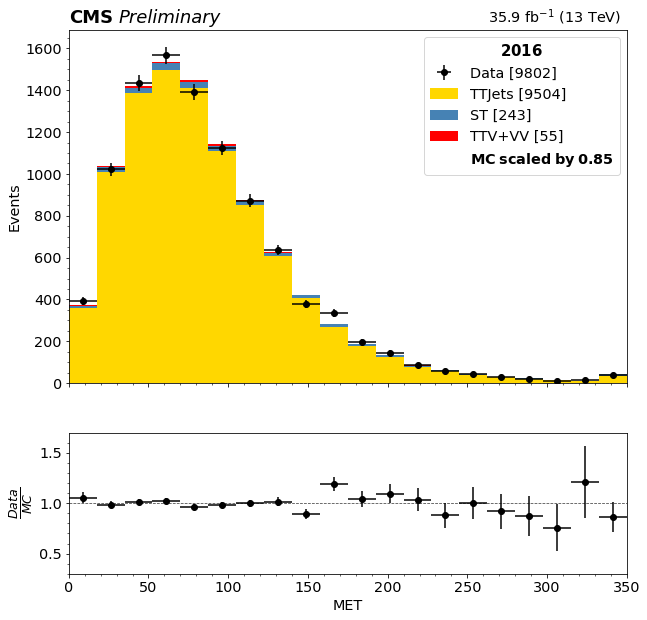

In [123]:
%%skip $flatten_babies
# Stacked hist
fig, (ax1, ax2) = plt.subplots(2,sharex=True,figsize=(10,10),gridspec_kw=dict(height_ratios=[5, 2]))
typical_hist("met", bins=np.linspace(0,350,21), hist_axes=ax1, ratio_axes=ax2)

# Dummy plot to add text to legend
ax1.plot(
    [],[],' ',
    label=r"$\bf{MC\hspace{0.25} scaled\hspace{0.25} by\hspace{0.25} %0.2f}$" % integral_w
)
format_ax1(ax1)
format_ax2(ax2, xlabel="MET")
#plt.savefig(plot_output_dir + 'met.png')

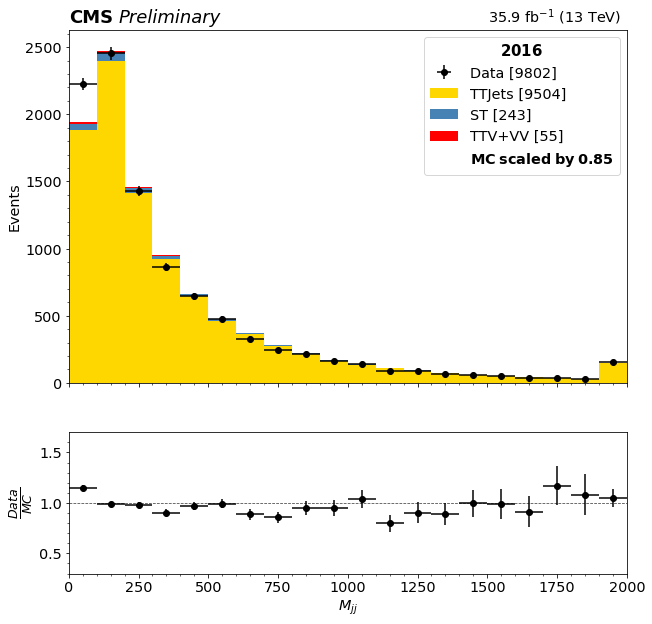

In [124]:
%%skip $flatten_babies
# Stacked hist
fig, (ax1, ax2) = plt.subplots(2,sharex=True,figsize=(10,10),gridspec_kw=dict(height_ratios=[5, 2]))
typical_hist("vbs_dijet_mass", bins=np.linspace(0,2000,21), hist_axes=ax1, ratio_axes=ax2)

# Dummy plot to add text to legend
ax1.plot(
    [],[],' ',
    label=r"$\bf{MC\hspace{0.25} scaled\hspace{0.25} by\hspace{0.25} %0.2f}$" % integral_w
)
format_ax1(ax1)
format_ax2(ax2, xlabel="$M_{jj}$")
#plt.savefig(plot_output_dir + 'vbs_dijet_mass.png')

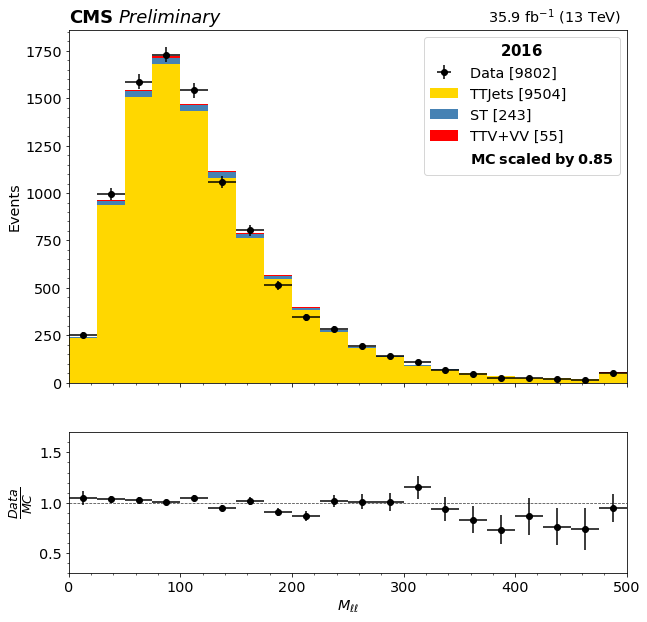

In [125]:
%%skip $flatten_babies
# Stacked hist
fig, (ax1, ax2) = plt.subplots(2,sharex=True,figsize=(10,10),gridspec_kw=dict(height_ratios=[5, 2]))
typical_hist("dilep_mass", bins=np.linspace(0,500,21), hist_axes=ax1, ratio_axes=ax2)

# Dummy plot to add text to legend
ax1.plot(
    [],[],' ',
    label=r"$\bf{MC\hspace{0.25} scaled\hspace{0.25} by\hspace{0.25} %0.2f}$" % integral_w
)
format_ax1(ax1)
format_ax2(ax2, xlabel="$M_{\ell\ell}$")
#plt.savefig(plot_output_dir + 'dilep_mass.png')

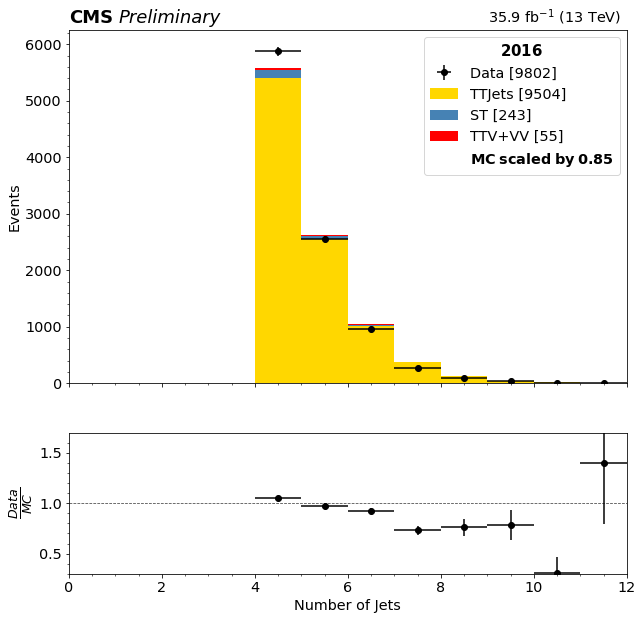

In [126]:
%%skip $flatten_babies
# Stacked hist
fig, (ax1, ax2) = plt.subplots(2,sharex=True,figsize=(10,10),gridspec_kw=dict(height_ratios=[5, 2]))
typical_hist("num_jets", bins=np.linspace(0,12,13), hist_axes=ax1, ratio_axes=ax2)

# Dummy plot to add text to legend
ax1.plot(
    [],[],' ',
    label=r"$\bf{MC\hspace{0.25} scaled\hspace{0.25} by\hspace{0.25} %0.2f}$" % integral_w
)
format_ax1(ax1)
format_ax2(ax2, xlabel="Number of Jets")
#plt.savefig(plot_output_dir + 'num_jets.png')

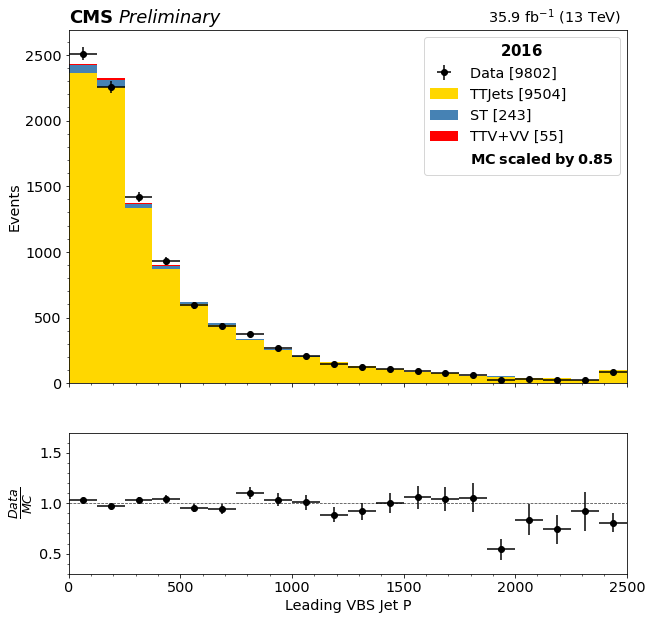

In [127]:
%%skip $flatten_babies
# Stacked hist
fig, (ax1, ax2) = plt.subplots(2,sharex=True,figsize=(10,10),gridspec_kw=dict(height_ratios=[5, 2]))
typical_hist("leading_vbs_jet_P", bins=np.linspace(0,2500,21), hist_axes=ax1, ratio_axes=ax2)

# Dummy plot to add text to legend
ax1.plot(
    [],[],' ',
    label=r"$\bf{MC\hspace{0.25} scaled\hspace{0.25} by\hspace{0.25} %0.2f}$" % integral_w
)
format_ax1(ax1)
format_ax2(ax2, xlabel=r"Leading VBS Jet P")
#plt.savefig(plot_output_dir + 'leading_vbs_jet_P.png')

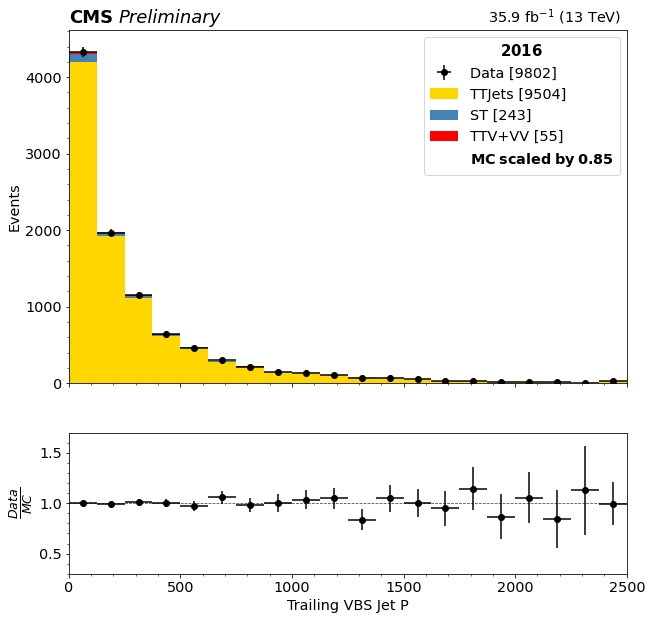

In [128]:
%%skip $flatten_babies
# Stacked hist
fig, (ax1, ax2) = plt.subplots(2,sharex=True,figsize=(10,10),gridspec_kw=dict(height_ratios=[5, 2]))
typical_hist("trailing_vbs_jet_P", bins=np.linspace(0,2500,21), hist_axes=ax1, ratio_axes=ax2)

# Dummy plot to add text to legend
ax1.plot(
    [],[],' ',
    label=r"$\bf{MC\hspace{0.25} scaled\hspace{0.25} by\hspace{0.25} %0.2f}$" % integral_w
)
format_ax1(ax1)
format_ax2(ax2, xlabel=r"Trailing VBS Jet P")
#plt.savefig(plot_output_dir + 'trailing_vbs_jet_P.png')

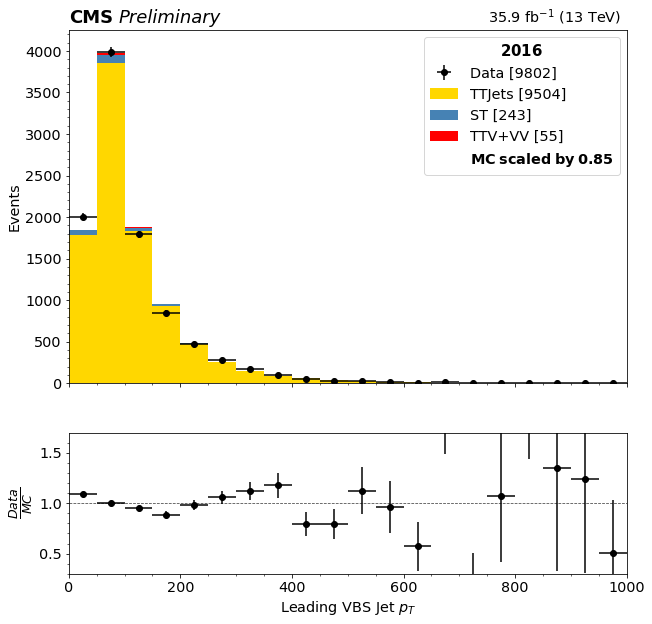

In [129]:
%%skip $flatten_babies
# Stacked hist
fig, (ax1, ax2) = plt.subplots(2,sharex=True,figsize=(10,10),gridspec_kw=dict(height_ratios=[5, 2]))
typical_hist("leading_vbs_jet_pt", bins=np.linspace(0,1000,21), hist_axes=ax1, ratio_axes=ax2)

# Dummy plot to add text to legend
ax1.plot(
    [],[],' ',
    label=r"$\bf{MC\hspace{0.25} scaled\hspace{0.25} by\hspace{0.25} %0.2f}$" % integral_w
)
format_ax1(ax1)
format_ax2(ax2, xlabel=r"Leading VBS Jet $p_T$")
#plt.savefig(plot_output_dir + 'leading_vbs_jet_pt.png')

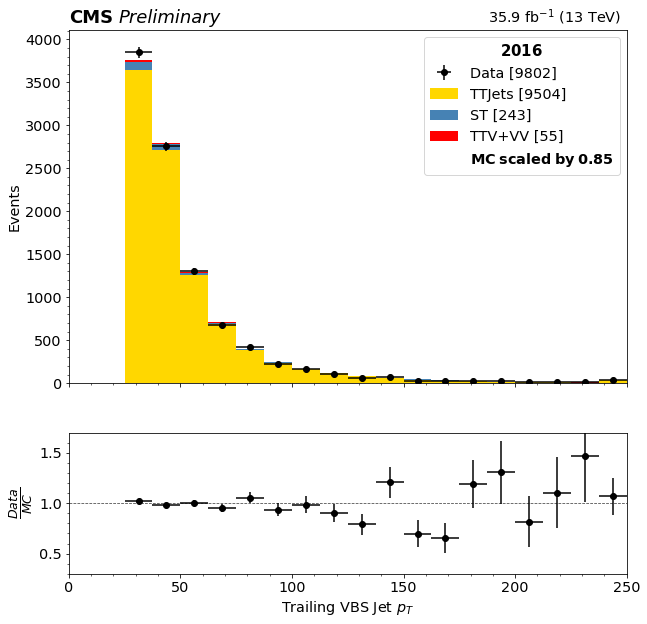

In [130]:
%%skip $flatten_babies
# Stacked hist
fig, (ax1, ax2) = plt.subplots(2,sharex=True,figsize=(10,10),gridspec_kw=dict(height_ratios=[5, 2]))
typical_hist("trailing_vbs_jet_pt", bins=np.linspace(0,250,21), hist_axes=ax1, ratio_axes=ax2)

# Dummy plot to add text to legend
ax1.plot(
    [],[],' ',
    label=r"$\bf{MC\hspace{0.25} scaled\hspace{0.25} by\hspace{0.25} %0.2f}$" % integral_w
)
format_ax1(ax1)
format_ax2(ax2, xlabel=r"Trailing VBS Jet $p_T$")
#plt.savefig(plot_output_dir + 'trailing_vbs_jet_pt.png')

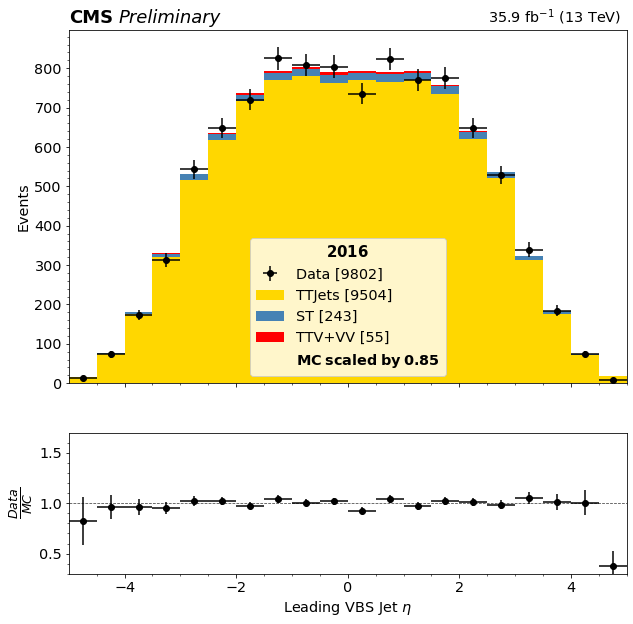

In [131]:
%%skip $flatten_babies
# Stacked hist
fig, (ax1, ax2) = plt.subplots(2,sharex=True,figsize=(10,10),gridspec_kw=dict(height_ratios=[5, 2]))
typical_hist("leading_vbs_jet_eta", bins=np.linspace(-5,5,21), hist_axes=ax1, ratio_axes=ax2)

# Dummy plot to add text to legend
ax1.plot(
    [],[],' ',
    label=r"$\bf{MC\hspace{0.25} scaled\hspace{0.25} by\hspace{0.25} %0.2f}$" % integral_w
)
format_ax1(ax1)
format_ax2(ax2, xlabel=r"Leading VBS Jet $\eta$")
#plt.savefig(plot_output_dir + 'leading_vbs_jet_eta.png')

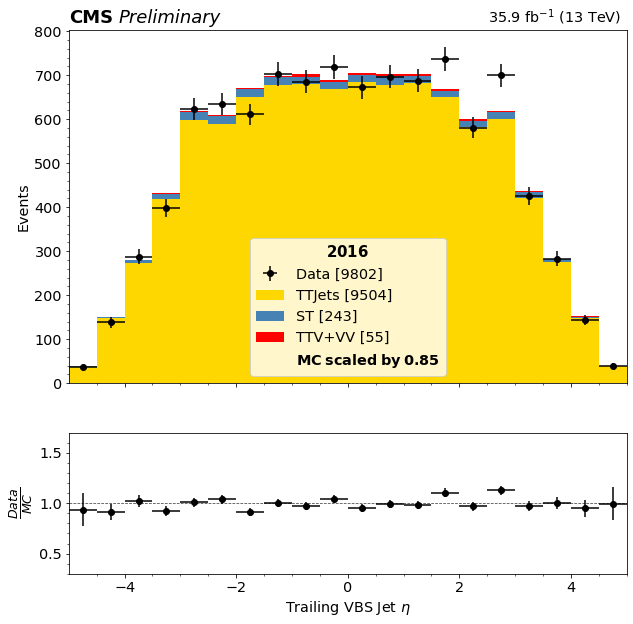

In [132]:
%%skip $flatten_babies
# Stacked hist
fig, (ax1, ax2) = plt.subplots(2,sharex=True,figsize=(10,10),gridspec_kw=dict(height_ratios=[5, 2]))
typical_hist("trailing_vbs_jet_eta", bins=np.linspace(-5,5,21), hist_axes=ax1, ratio_axes=ax2)

# Dummy plot to add text to legend
ax1.plot(
    [],[],' ',
    label=r"$\bf{MC\hspace{0.25} scaled\hspace{0.25} by\hspace{0.25} %0.2f}$" % integral_w
)
format_ax1(ax1)
format_ax2(ax2, xlabel=r"Trailing VBS Jet $\eta$")
#plt.savefig(plot_output_dir + 'trailing_vbs_jet_eta.png')

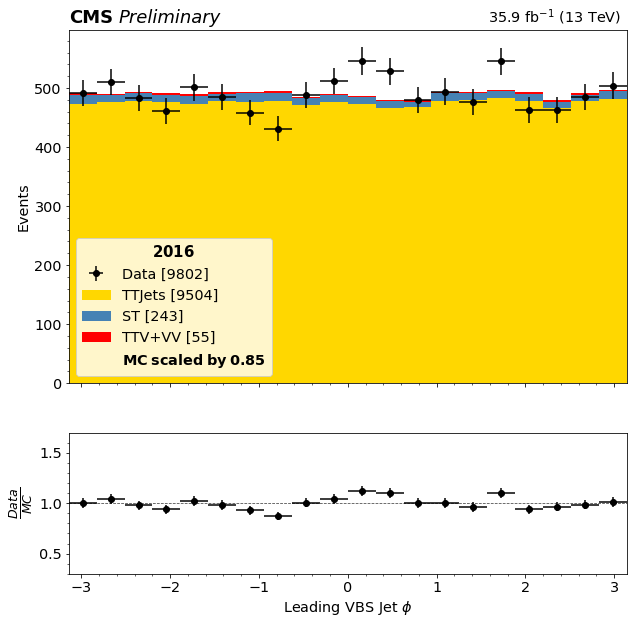

In [133]:
%%skip $flatten_babies
# Stacked hist
fig, (ax1, ax2) = plt.subplots(2,sharex=True,figsize=(10,10),gridspec_kw=dict(height_ratios=[5, 2]))
typical_hist("leading_vbs_jet_phi", bins=np.linspace(-np.pi,np.pi,21), hist_axes=ax1, ratio_axes=ax2)

# Dummy plot to add text to legend
ax1.plot(
    [],[],' ',
    label=r"$\bf{MC\hspace{0.25} scaled\hspace{0.25} by\hspace{0.25} %0.2f}$" % integral_w
)
format_ax1(ax1)
format_ax2(ax2, xlabel=r"Leading VBS Jet $\phi$")
#plt.savefig(plot_output_dir + 'leading_vbs_jet_phi.png')

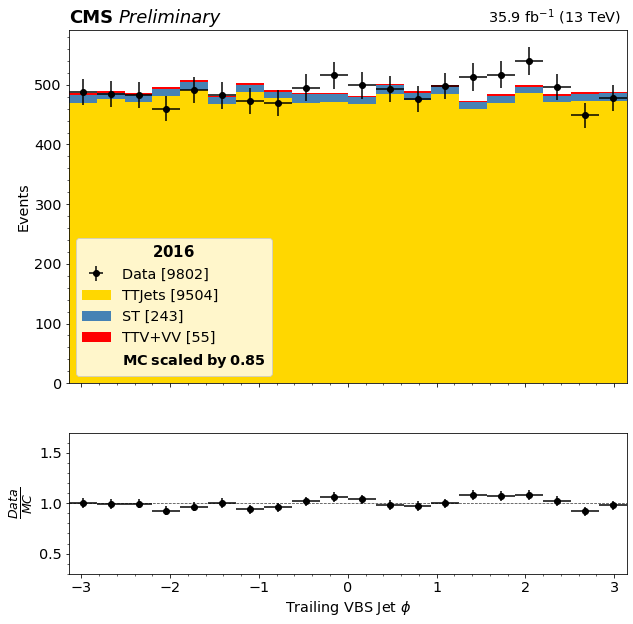

In [134]:
%%skip $flatten_babies
# Stacked hist
fig, (ax1, ax2) = plt.subplots(2,sharex=True,figsize=(10,10),gridspec_kw=dict(height_ratios=[5, 2]))
typical_hist("trailing_vbs_jet_phi", bins=np.linspace(-np.pi,np.pi,21), hist_axes=ax1, ratio_axes=ax2)

# Dummy plot to add text to legend
ax1.plot(
    [],[],' ',
    label=r"$\bf{MC\hspace{0.25} scaled\hspace{0.25} by\hspace{0.25} %0.2f}$" % integral_w
)
format_ax1(ax1)
format_ax2(ax2, xlabel=r"Trailing VBS Jet $\phi$")
#plt.savefig(plot_output_dir + 'trailing_vbs_jet_phi.png')

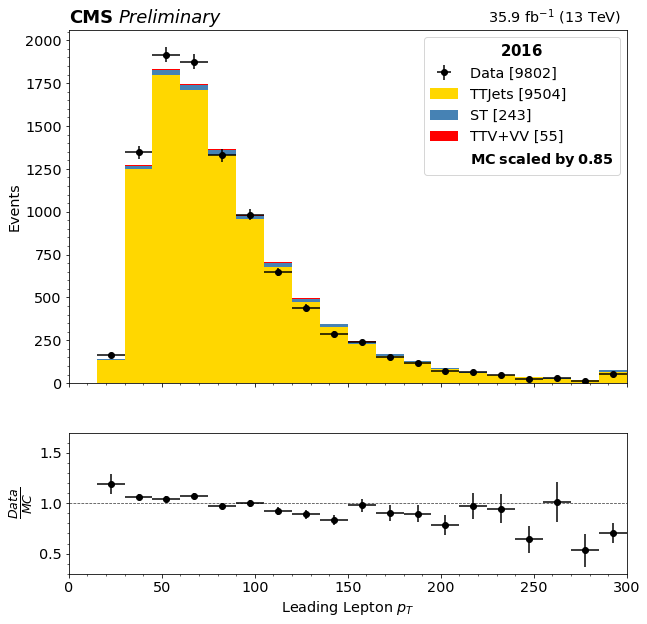

In [135]:
%%skip $flatten_babies
# Stacked hist
fig, (ax1, ax2) = plt.subplots(2,sharex=True,figsize=(10,10),gridspec_kw=dict(height_ratios=[5, 2]))
typical_hist("leading_lep_pt", bins=np.linspace(0,300,21), hist_axes=ax1, ratio_axes=ax2)

# Dummy plot to add text to legend
ax1.plot(
    [],[],' ',
    label=r"$\bf{MC\hspace{0.25} scaled\hspace{0.25} by\hspace{0.25} %0.2f}$" % integral_w
)
format_ax1(ax1)
format_ax2(ax2, xlabel=r"Leading Lepton $p_T$")
#plt.savefig(plot_output_dir + 'leading_lep_pt.png')

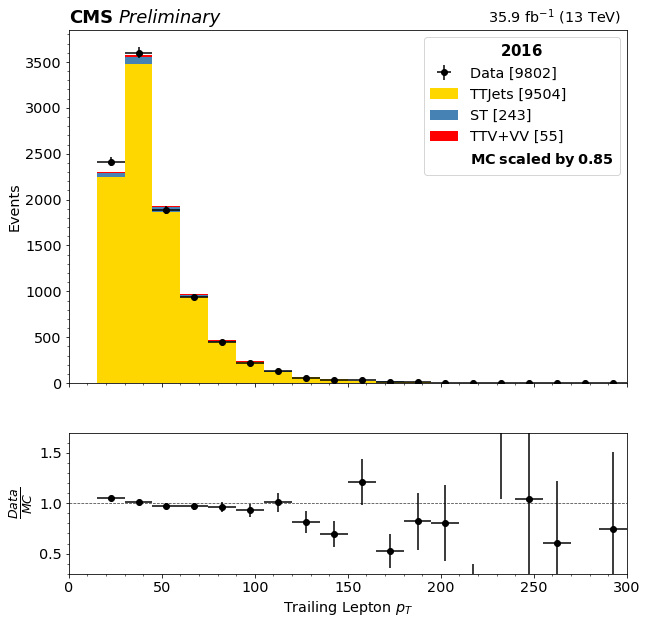

In [136]:
%%skip $flatten_babies
# Stacked hist
fig, (ax1, ax2) = plt.subplots(2,sharex=True,figsize=(10,10),gridspec_kw=dict(height_ratios=[5, 2]))
typical_hist("trailing_lep_pt", bins=np.linspace(0,300,21), hist_axes=ax1, ratio_axes=ax2)

# Dummy plot to add text to legend
ax1.plot(
    [],[],' ',
    label=r"$\bf{MC\hspace{0.25} scaled\hspace{0.25} by\hspace{0.25} %0.2f}$" % integral_w
)
format_ax1(ax1)
format_ax2(ax2, xlabel=r"Trailing Lepton $p_T$")
#plt.savefig(plot_output_dir + 'trailing_lep_pt.png')

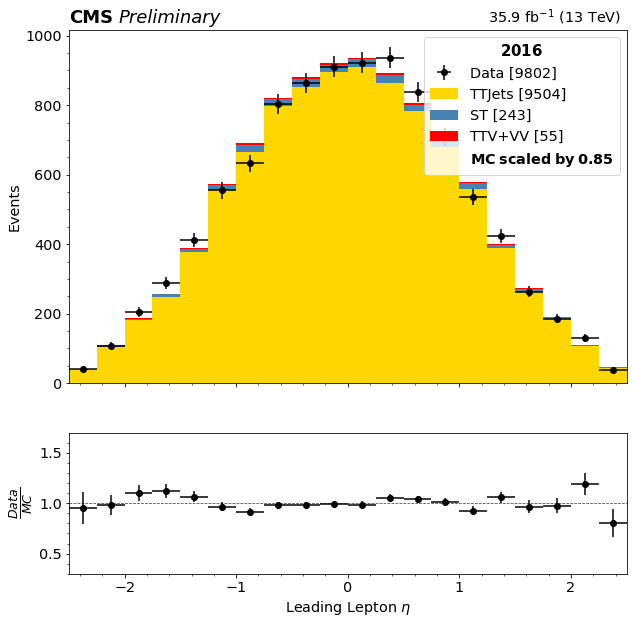

In [137]:
%%skip $flatten_babies
# Stacked hist
fig, (ax1, ax2) = plt.subplots(2,sharex=True,figsize=(10,10),gridspec_kw=dict(height_ratios=[5, 2]))
typical_hist("leading_lep_eta", bins=np.linspace(-2.5,2.5,21), hist_axes=ax1, ratio_axes=ax2)

# Dummy plot to add text to legend
ax1.plot(
    [],[],' ',
    label=r"$\bf{MC\hspace{0.25} scaled\hspace{0.25} by\hspace{0.25} %0.2f}$" % integral_w
)
format_ax1(ax1)
format_ax2(ax2, xlabel=r"Leading Lepton $\eta$")
#plt.savefig(plot_output_dir + 'leading_lep_eta.png')

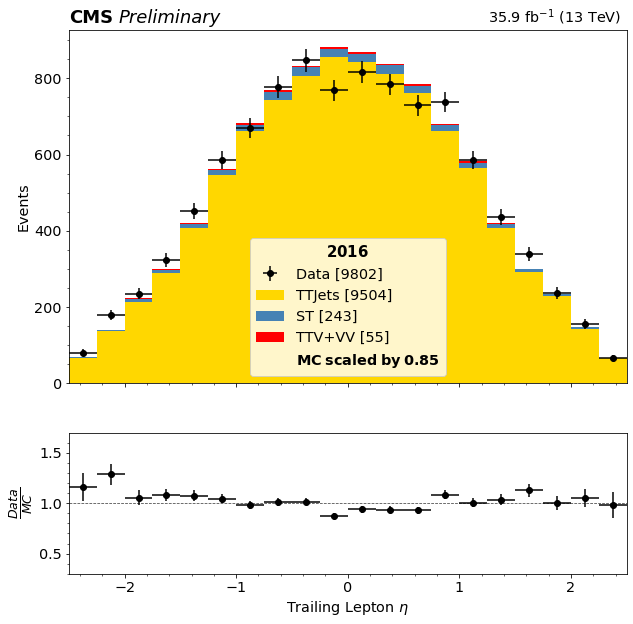

In [138]:
%%skip $flatten_babies
# Stacked hist
fig, (ax1, ax2) = plt.subplots(2,sharex=True,figsize=(10,10),gridspec_kw=dict(height_ratios=[5, 2]))
typical_hist("trailing_lep_eta", bins=np.linspace(-2.5,2.5,21), hist_axes=ax1, ratio_axes=ax2)

# Dummy plot to add text to legend
ax1.plot(
    [],[],' ',
    label=r"$\bf{MC\hspace{0.25} scaled\hspace{0.25} by\hspace{0.25} %0.2f}$" % integral_w
)
format_ax1(ax1)
format_ax2(ax2, xlabel=r"Trailing Lepton $\eta$")
#plt.savefig(plot_output_dir + 'trailing_lep_eta.png')

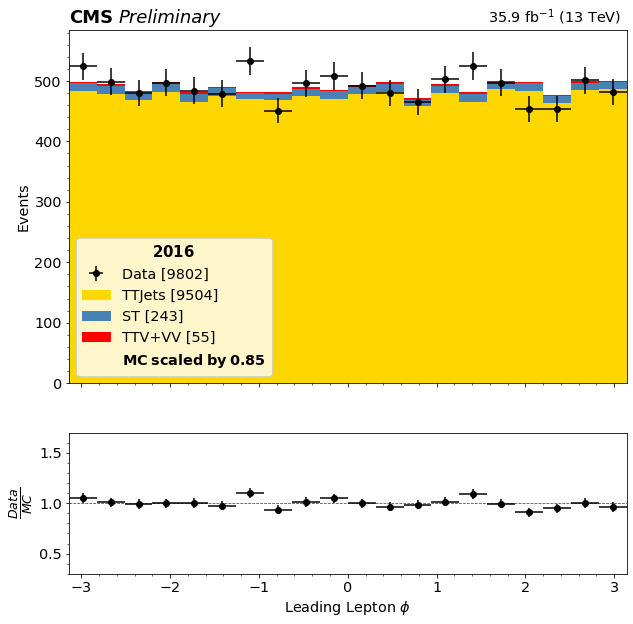

In [139]:
%%skip $flatten_babies
# Stacked hist
fig, (ax1, ax2) = plt.subplots(2,sharex=True,figsize=(10,10),gridspec_kw=dict(height_ratios=[5, 2]))
typical_hist("leading_lep_phi", bins=np.linspace(-np.pi,np.pi,21), hist_axes=ax1, ratio_axes=ax2)

# Dummy plot to add text to legend
ax1.plot(
    [],[],' ',
    label=r"$\bf{MC\hspace{0.25} scaled\hspace{0.25} by\hspace{0.25} %0.2f}$" % integral_w
)
format_ax1(ax1)
format_ax2(ax2, xlabel=r"Leading Lepton $\phi$")
#plt.savefig(plot_output_dir + 'leading_lep_phi.png')

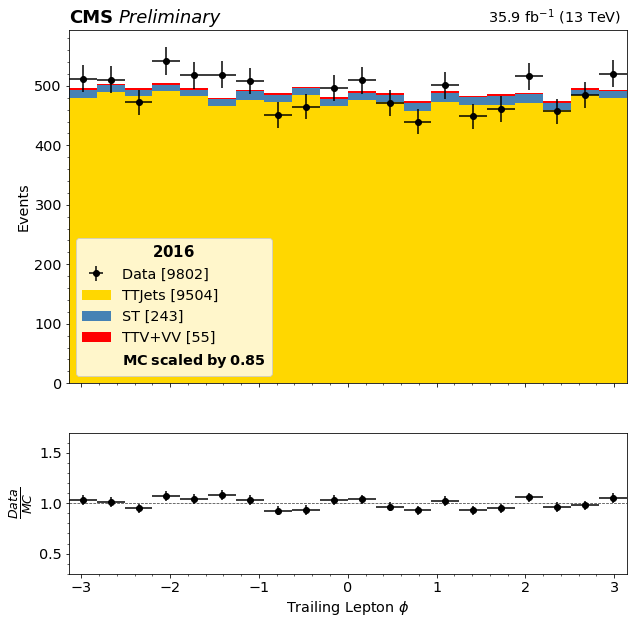

In [140]:
%%skip $flatten_babies
# Stacked hist
fig, (ax1, ax2) = plt.subplots(2,sharex=True,figsize=(10,10),gridspec_kw=dict(height_ratios=[5, 2]))
typical_hist("trailing_lep_phi", bins=np.linspace(-np.pi,np.pi,21), hist_axes=ax1, ratio_axes=ax2)

# Dummy plot to add text to legend
ax1.plot(
    [],[],' ',
    label=r"$\bf{MC\hspace{0.25} scaled\hspace{0.25} by\hspace{0.25} %0.2f}$" % integral_w
)
format_ax1(ax1)
format_ax2(ax2, xlabel=r"Trailing Lepton $\phi$")
#plt.savefig(plot_output_dir + 'trailing_lep_phi.png')

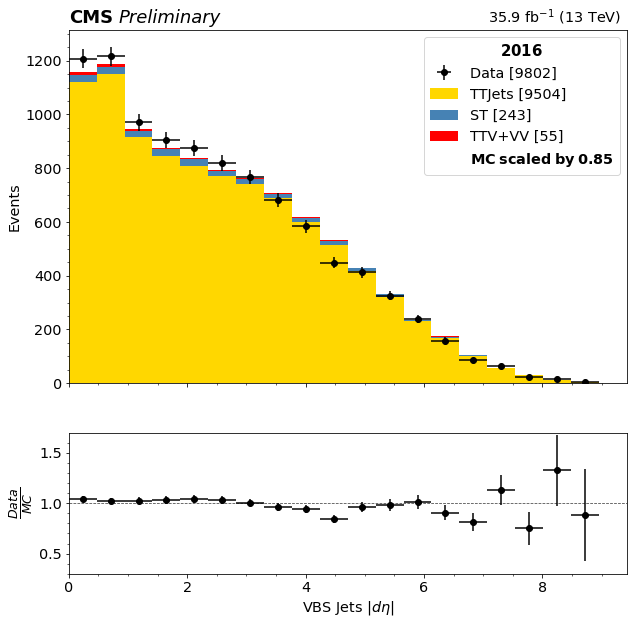

In [141]:
%%skip $flatten_babies
# Stacked hist
fig, (ax1, ax2) = plt.subplots(2,sharex=True,figsize=(10,10),gridspec_kw=dict(height_ratios=[5, 2]))
not_a_typical_hist("leading_vbs_jet_eta", "trailing_vbs_jet_eta", bins=np.linspace(0,3*np.pi,21), hist_axes=ax1, ratio_axes=ax2)

# Dummy plot to add text to legend
ax1.plot(
    [],[],' ',
    label=r"$\bf{MC\hspace{0.25} scaled\hspace{0.25} by\hspace{0.25} %0.2f}$" % integral_w
)
format_ax1(ax1)
format_ax2(ax2, xlabel=r"VBS Jets $|d\eta$|")
#plt.savefig(plot_output_dir + 'vbs_jet_deta.png')

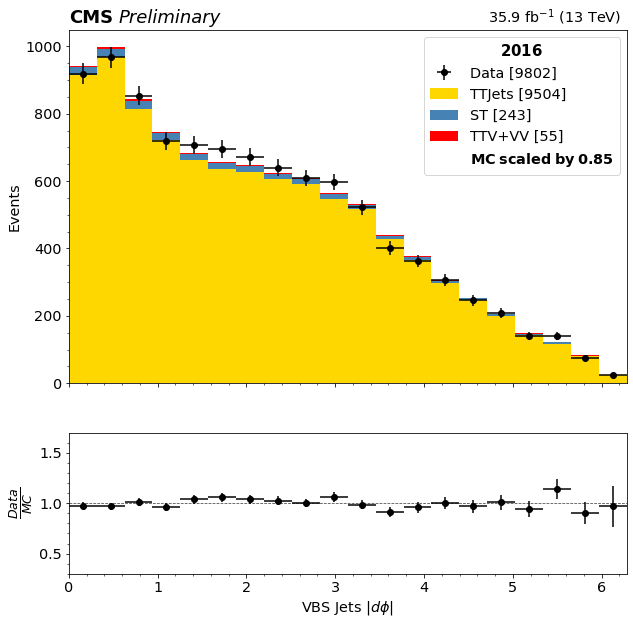

In [142]:
%%skip $flatten_babies
# Stacked hist
fig, (ax1, ax2) = plt.subplots(2,sharex=True,figsize=(10,10),gridspec_kw=dict(height_ratios=[5, 2]))
not_a_typical_hist("leading_vbs_jet_phi", "trailing_vbs_jet_phi", bins=np.linspace(0,2*np.pi,21), hist_axes=ax1, ratio_axes=ax2)

# Dummy plot to add text to legend
ax1.plot(
    [],[],' ',
    label=r"$\bf{MC\hspace{0.25} scaled\hspace{0.25} by\hspace{0.25} %0.2f}$" % integral_w
)
format_ax1(ax1)
format_ax2(ax2, xlabel=r"VBS Jets $|d\phi$|")
#plt.savefig(plot_output_dir + 'vbs_jet_dphi.png')